In [2]:
from pylab import * 
import matplotlib.pyplot as plt
import os
import pyAgrum as gum 
import pyAgrum.lib.notebook as gnb
from IPython.display import display, SVG
import math

In [3]:
# setting up the network 
bn = gum.BayesNet("WillGoToCollege")
id_pc=bn.add(gum.LabelizedVariable('parentsCollege','parentsCollege',2))
id_pa=bn.add(gum.LabelizedVariable('parentsAge','parentsAge',2))
id_ps = bn.add(gum.LabelizedVariable('parentsSalary','parentsSalary',2))
id_sa = bn.add(gum.LabelizedVariable('schoolAccreditation','schoolAccreditation',2))
id_st = bn.add(gum.LabelizedVariable('schoolType','schoolType',2))
id_ag = bn.add(gum.LabelizedVariable('averageGrades','averageGrades',2))
id_in = bn.add(gum.LabelizedVariable('interest','interest',3))
id_ra = bn.add(gum.LabelizedVariable('residentialArea','residentialArea',2))
id_gc = bn.add(gum.LabelizedVariable('goToCollege','goToCollege',2))

for link in [(id_pc,id_ps),(id_ps,id_sa),  (id_sa, id_ag), (id_pa,id_ps), (id_ps,id_ra), (id_st,id_ag), (id_in,id_gc), (id_ag,id_gc)]:
    bn.addArc(*link)
bn

(pyAgrum.BayesNet<double>@000001A593485280) BN{nodes: 9, arcs: 8, domainSize: 768, dim: 23, mem: 360o}

Free standing nodes 

In [4]:
bn.cpt("parentsCollege").fillWith([0.48,0.52])
bn.cpt("parentsAge").fillWith([0.387,0.613])
bn.cpt("interest").fillWith([0.424,0.261,0.315])
bn.cpt("schoolType").fillWith([0.391,0.609])



(pyAgrum.Potential<double>@000001A59359A1D0) 
  schoolType       |
0        |1        |
---------|---------|
 0.3910  | 0.6090  |

Conditional Probabilities

Parents Salary | Went to college and Age

In [5]:
# Fill the CPT for parentsSalary given parentsCollege and parentsAge
bn.cpt("parentsSalary")[{'parentsAge': 0, 'parentsCollege': 0}] = [0.329896907216495, 0.670103092783505]  # Parent College = FALSE, Parent Age = Old
bn.cpt("parentsSalary")[{'parentsAge': 0, 'parentsCollege': 1}] = [0.362068965517241, 1-0.362068965517241]                 # Parent College = TRUE, Parent Age = Old
bn.cpt("parentsSalary")[{'parentsAge': 1, 'parentsCollege': 0}] = [0.600522193211488, 0.399477806788512]  # Parent College = FALSE, Parent Age = Young
bn.cpt("parentsSalary")[{'parentsAge': 1, 'parentsCollege': 1}] = [0.5, 0.5]  # Parent College = TRUE, Parent Age = Young
bn.cpt("parentsSalary")

(pyAgrum.Potential<double>@000001A59359A3D0) 
             ||  parentsSalary    |
parent|parent||0        |1        |
------|------||---------|---------|
0     |0     || 0.3299  | 0.6701  |
1     |0     || 0.3621  | 0.6379  |
0     |1     || 0.6005  | 0.3995  |
1     |1     || 0.5000  | 0.5000  |

School Accreditation | Parents Salary 

In [6]:
bn.cpt("schoolAccreditation")[{'parentsSalary': 0}] = [1-0.466804979253112, 0.466804979253112]  
bn.cpt("schoolAccreditation")[{'parentsSalary': 1}] = [0.505791505791506, 1-0.505791505791506]                 
bn.cpt("schoolAccreditation")

(pyAgrum.Potential<double>@000001A59359A3F0) 
      ||  schoolAccreditati|
parent||0        |1        |
------||---------|---------|
0     || 0.5332  | 0.4668  |
1     || 0.5058  | 0.4942  |

Average Grades | School Accreditation and School Type 

In [7]:
bn.cpt("averageGrades")[{'schoolAccreditation': 0, 'schoolType': 0}] = [0.580808080808081, 1-0.580808080808081]  
bn.cpt("averageGrades")[{'schoolAccreditation': 0, 'schoolType': 1}] = [1-0.526479750778816, 0.526479750778816]                
bn.cpt("averageGrades")[{'schoolAccreditation': 1, 'schoolType': 0}] = [1-0.430051813471503, 0.430051813471503]  
bn.cpt("averageGrades")[{'schoolAccreditation': 1, 'schoolType': 1}] = [1-0.399305555555556, 0.399305555555556]  
bn.cpt("averageGrades")

(pyAgrum.Potential<double>@000001A59359A690) 
             ||  averageGrades    |
school|school||0        |1        |
------|------||---------|---------|
0     |0     || 0.5808  | 0.4192  |
1     |0     || 0.5699  | 0.4301  |
0     |1     || 0.4735  | 0.5265  |
1     |1     || 0.6007  | 0.3993  |

Residence | Parents Salary 

In [8]:
bn.cpt("residentialArea")[{'parentsSalary': 0}] = [1-0.319502074688797, 0.319502074688797]  
bn.cpt("residentialArea")[{'parentsSalary': 1}] = [1-0.592664092664093, 0.592664092664093]                 
bn.cpt("residentialArea")

(pyAgrum.Potential<double>@000001A59359A130) 
      ||  residentialArea  |
parent||0        |1        |
------||---------|---------|
0     || 0.6805  | 0.3195  |
1     || 0.4073  | 0.5927  |

Go To College | Grades, Interest

In [9]:
# Fill the CPT for parentsSalary given parentsCollege and parentsAge
bn.cpt("goToCollege")[{'averageGrades': 1, 'interest': 2}] = [0.82258064516129, 1-0.82258064516129]  # Avg Grade = Good, Interest = Yes
bn.cpt("goToCollege")[{'averageGrades': 1, 'interest': 1}] = [0.763157895, 1-0.763157895]  # Avg Grade = Good, Interest = Maybe
bn.cpt("goToCollege")[{'averageGrades': 1, 'interest': 0}] = [0.723214286, 1-0.723214286]  # Avg Grade = Good, Interest = No
bn.cpt("goToCollege")[{'averageGrades': 0, 'interest': 2}] = [0.235294118, 1-0.235294118]  # Avg Grade = Bad, Interest = Yes
bn.cpt("goToCollege")[{'averageGrades': 0, 'interest': 1}] = [0.385321101, 1-0.385321101]  # Avg Grade = Bad, Interest = Maybe
bn.cpt("goToCollege")[{'averageGrades': 0, 'interest': 0}] = [0.256157635, 1-0.256157635]  # Avg Grade = Bad, Interest = No
bn.cpt("goToCollege")

(pyAgrum.Potential<double>@000001A59359A490) 
             ||  goToCollege      |
intere|averag||0        |1        |
------|------||---------|---------|
0     |0     || 0.2562  | 0.7438  |
1     |0     || 0.3853  | 0.6147  |
2     |0     || 0.2353  | 0.7647  |
0     |1     || 0.7232  | 0.2768  |
1     |1     || 0.7632  | 0.2368  |
2     |1     || 0.8226  | 0.1774  |

# Computing the Bayesian Network 


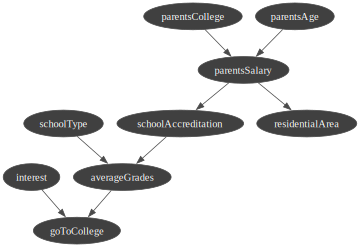

In [10]:
gum.config['notebook','potential_visible_digits']=2
gnb.sideBySide(bn.cpt("parentsCollege"),captions=['P(Parents go to college)'])
gnb.sideBySide(bn.cpt("parentsAge"),captions=['P(Parents Age)'])
gnb.sideBySide(bn.cpt("parentsSalary"),captions=['P(Parents Salary|College,Age)'])
display(SVG(gnb.getBN(bn)))

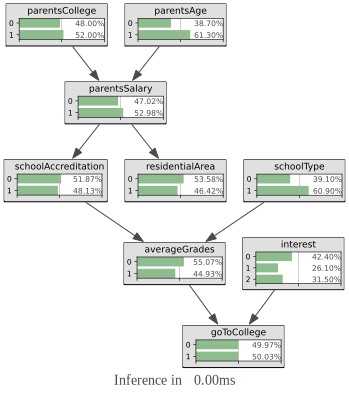

In [11]:
gnb.showInference(bn, evs={})

Stephan's Inference

In [19]:
ie = gum.LazyPropagation(bn)
ie.setEvidence({'interest': 0})
posterior_College = ie.posterior('goToCollege')
print(f"P(College|Interest=0): {posterior_College}")
ie = gum.LazyPropagation(bn)
ie.setEvidence({'interest': 1})
posterior_College = ie.posterior('goToCollege')
print(f"P(College|Interest=1): {posterior_College}")
ie = gum.LazyPropagation(bn)
ie.setEvidence({'interest': 2})
posterior_College = ie.posterior('goToCollege')
print(f"P(College|Interest=2): {posterior_College}")



TypeError: in method 'new_LazyPropagation', argument 1 of type 'gum::IBayesNet< double > const *'
Additional information:
Wrong number or type of arguments for overloaded function 'new_LazyPropagation'.
  Possible C/C++ prototypes are:
    gum::LazyPropagation< double >::LazyPropagation(gum::IBayesNet< double > const *,gum::RelevantPotentialsFinderType,gum::FindBarrenNodesType,bool)
    gum::LazyPropagation< double >::LazyPropagation(gum::IBayesNet< double > const *,gum::RelevantPotentialsFinderType,gum::FindBarrenNodesType)
    gum::LazyPropagation< double >::LazyPropagation(gum::IBayesNet< double > const *,gum::RelevantPotentialsFinderType)
    gum::LazyPropagation< double >::LazyPropagation(gum::IBayesNet< double > const *)


Decision Network 

In [13]:
# Create an empty Influence Diagram without arguments
bn = gum.InfluenceDiagram()

# Add nodes (LabelizedVariable represents variables in the network)
id_pc = bn.add(gum.LabelizedVariable('parentsCollege', 'parentsCollege', 2))
id_pa = bn.add(gum.LabelizedVariable('parentsAge', 'parentsAge', 2))
id_ps = bn.add(gum.LabelizedVariable('parentsSalary', 'parentsSalary', 2))
id_sa = bn.add(gum.LabelizedVariable('schoolAccreditation', 'schoolAccreditation', 2))
id_st = bn.add(gum.LabelizedVariable('schoolType', 'schoolType', 2))
id_ag = bn.add(gum.LabelizedVariable('averageGrades', 'averageGrades', 2))
id_in = bn.add(gum.LabelizedVariable('interest', 'interest', 3))
id_ra = bn.add(gum.LabelizedVariable('residentialArea', 'residentialArea', 2))
id_ap = bn.addDecisionNode(gum.LabelizedVariable("applyToCollege", "applyToCollege",2))
id_u = bn.addUtilityNode(gum.LabelizedVariable("utility", "utility",1))

# Add arcs (links between the variables)
for link in [(id_pc, id_ps), (id_ps, id_sa), (id_sa, id_ag), (id_pa, id_ps), (id_ps, id_ra), (id_st, id_ag), (id_in, id_u), (id_ag,id_u), (id_ap, id_u)]:
    bn.addArc(*link)

bn

(pyAgrum.InfluenceDiagram<double>@000001A5913758D0) Influence Diagram{
  chance: 8,
  utility: 1,
  decision: 1,
  arcs: 9,
  domainSize: 768
}

In [14]:
bn.cpt("parentsCollege").fillWith([0.48,0.52])
bn.cpt("parentsAge").fillWith([0.387,0.613])
bn.cpt("interest").fillWith([0.424,0.261,0.315])
bn.cpt("schoolType").fillWith([0.391,0.609])
bn.cpt("parentsSalary")[{'parentsAge': 0, 'parentsCollege': 0}] = [0.329896907216495, 0.670103092783505]  # Parent College = FALSE, Parent Age = Old
bn.cpt("parentsSalary")[{'parentsAge': 0, 'parentsCollege': 1}] = [0.362068965517241, 1-0.362068965517241]                 # Parent College = TRUE, Parent Age = Old
bn.cpt("parentsSalary")[{'parentsAge': 1, 'parentsCollege': 0}] = [0.600522193211488, 0.399477806788512]  # Parent College = FALSE, Parent Age = Young
bn.cpt("parentsSalary")[{'parentsAge': 1, 'parentsCollege': 1}] = [0.5, 0.5]  # Parent College = TRUE, Parent Age = Young
bn.cpt("schoolAccreditation")[{'parentsSalary': 0}] = [1-0.466804979253112, 0.466804979253112]  
bn.cpt("schoolAccreditation")[{'parentsSalary': 1}] = [0.505791505791506, 1-0.505791505791506]                 
bn.cpt("averageGrades")[{'schoolAccreditation': 0, 'schoolType': 0}] = [0.580808080808081, 1-0.580808080808081]  
bn.cpt("averageGrades")[{'schoolAccreditation': 0, 'schoolType': 1}] = [1-0.526479750778816, 0.526479750778816]                
bn.cpt("averageGrades")[{'schoolAccreditation': 1, 'schoolType': 0}] = [1-0.430051813471503, 0.430051813471503]  
bn.cpt("averageGrades")[{'schoolAccreditation': 1, 'schoolType': 1}] = [1-0.399305555555556, 0.399305555555556]  
bn.cpt("residentialArea")[{'parentsSalary': 0}] = [1-0.319502074688797, 0.319502074688797]  
bn.cpt("residentialArea")[{'parentsSalary': 1}] = [1-0.592664092664093, 0.592664092664093]                 


In [15]:
gnb.flow.row(bn, gnb.getInference(bn))

In [16]:
#utility function 
bn.utility(id_u)[{'averageGrades':1, 'interest':0, 'applyToCollege' :0}]=-50
bn.utility(id_u)[{'averageGrades':0, 'interest':0, 'applyToCollege' :0}]=100
bn.utility(id_u)[{'averageGrades':1, 'interest':2, 'applyToCollege' :0}]=-100
bn.utility(id_u)[{'averageGrades':0, 'interest':2, 'applyToCollege' :0}]=0
bn.utility(id_u)[{'averageGrades':1, 'interest':1, 'applyToCollege' :0}]=20
bn.utility(id_u)[{'averageGrades':0, 'interest':1, 'applyToCollege' :0}]=0

bn.utility(id_u)[{'averageGrades':1, 'interest':2, 'applyToCollege' :1}]=100
bn.utility(id_u)[{'averageGrades':0, 'interest':2, 'applyToCollege' :1}]=40
bn.utility(id_u)[{'averageGrades':1, 'interest':0, 'applyToCollege' :1}]=70
bn.utility(id_u)[{'averageGrades':0, 'interest':0, 'applyToCollege' :1}]=-100
bn.utility(id_u)[{'averageGrades':1, 'interest':1, 'applyToCollege' :1}]=80
bn.utility(id_u)[{'averageGrades':0, 'interest':1, 'applyToCollege' :1}]=0
gnb.flow.row(bn, gnb.getInference(bn))

In [17]:
def show_decisions(ie):
    gnb.flow.row(ie.optimalDecision("applyToCollege"),
                   f"$${ie.MEU()['mean']:5.3f}\\ (stdev : {math.sqrt(ie.MEU()['variance']):5.3f})$$",
                   captions=["Strategy for AC",
                             "Strategy for AG",
                             "MEU and its standard deviation"])
    gnb.flow.row(ie.posterior("applyToCollege"),ie.posteriorUtility("applyToCollege"),
                  captions=["Final decision for applyToCollege","Final reward for applyToCollege"])

ie=gum.ShaferShenoyLIMIDInference(bn)
ie.makeInference()
show_decisions(ie)

Reward is lower for not applying to college than applying - which is what we are aiming for 